# **Praktikum IV Machine Learning**

'''
=================================================
Nama  : Athaya Fairuzindah

NPM : F1F022039

=================================================
'''

# Latar Belakang

Ensemble Learning adalah teknik machine learning yang melibatkan penggabungan beberapa model individu untuk menciptakan model prediktif yang lebih kuat dan akurat. Konsep ini berakar pada kebijaksanaan kolektif yang menyatakan bahwa keputusan bersama lebih baik daripada keputusan individual. Secara formal, Ensemble Learning diperkenalkan dalam komunitas machine learning melalui paper Robert Schapire pada tahun 1990, meskipun fondasi awal dapat dilacak dari karya David Wolpert pada awal 1990-an dengan konsep "Stacked Generalization" yang dipublikasikan pada tahun 1992. Dalam pendekatan ensemble, multiple base models dilatih secara independen menggunakan algoritma yang berbeda atau parameter yang berbeda, kemudian prediksi mereka digabungkan untuk menghasilkan output final yang superior. Keunggulan utama ensemble learning terletak pada prinsip fundamental bahwa kekuatan dari setiap model dapat menutupi kelemahan model lainnya, sehingga menghasilkan peningkatan kinerja secara keseluruhan.​​

Metode ensemble bertujuan untuk mengurangi variance dan bias dari model individu dengan memanfaatkan trade-off bias-variance. Berbagai penelitian telah menunjukkan bahwa ensemble methods dapat meningkatkan akurasi generalisasi model dengan meminimalkan overfitting. Sebagai contoh, penelitian pada dataset telemarketing perbankan menunjukkan bahwa Random Forest dan AdaBoost secara konsisten menunjukkan performa baik dengan akurasi 91% dan nilai AUC mencapai 0.94. Teknik ensemble juga telah terbukti efektif dalam berbagai aplikasi praktis, termasuk deteksi kanker payudara dengan akurasi mencapai 99.45%, identifikasi penyakit mata dengan pendekatan imbalanced data, dan prediksi gagal jantung dengan akurasi hingga 98.17%. Hal ini menunjukkan bahwa kombinasi intelligent dari multiple models dapat secara signifikan meningkatkan robustness, akurasi, dan keandalan prediksi dibandingkan dengan model tunggal.​

Terdapat beberapa jenis teknik ensemble learning yang umum digunakan, antara lain Voting, Bagging, Boosting, dan Stacking. Bagging (Bootstrap Aggregating), diperkenalkan oleh Leo Breiman pada tahun 1994, melatih multiple models pada subset yang berbeda dari data training untuk mengurangi variance. Random Forest sebagai implementasi bagging telah menjadi salah satu algoritma paling populer dengan konsistensi performa tinggi. Sebaliknya, teknik Boosting, seperti AdaBoost yang diusulkan oleh Yoav Freund dan Robert Schapire pada tahun 1996, melatih weak learners secara sekuensial untuk memperbaiki error dari model sebelumnya, sehingga lebih efektif dalam mengurangi bias. Stacking menggabungkan multiple diverse models melalui meta-learner yang mengagregasi prediksi base models, seringkali mencapai akurasi yang kompetitif dibandingkan dengan teknik ensemble lainnya. Pemilihan teknik ensemble yang tepat bergantung pada karakteristik dataset, kompleksitas masalah, dan trade-off antara akurasi dan waktu komputasi yang diinginkan.

# Rumusan Masalah

1.   Bagaimana konsep dasar Random Forest?
2.   Bagaimana mengimplementasikan Random Forest untuk klasifikasi dan regresi menggunakan scikit-learn?
3. Bagaimana melakukan evaluasi model menggunakan metrik performa?
4. Bagaimana menginterpretasikan hasil pemodelan?

# Tujuan Penelitian


1.   Menjelaskan konsep dasar Random Forest.
2.   Mengimplementasikan Random Forest untuk klasifikasi dan regresi menggunakan scikit-learn.
3. Melakukan evaluasi model menggunakan metrik performa.
4. Menginterpretasikan hasil pemodelan.

# Mengimpor _Libraries_

Berikut merupakan _library_ yang akan digunakan dalam _notebook_ ini:

In [1]:
!pip install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.0/230.0 kB 5.5 MB/s eta 0:00:00


In [2]:
# Import Dasar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Metrics
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Ensemble Methods
from sklearn.ensemble import (
    VotingClassifier,
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier
)

import warnings
warnings.filterwarnings('ignore')

# Memuat Data

In [4]:
# Data Loading

url = 'https://raw.githubusercontent.com/Royallist/DATA-MACHINE-LEARNING/refs/heads/main/mental_health_dataset.csv'
df = pd.read_csv(url, sep=';')

# Menampilkan 5 data teratas
print("Dataset Head:")
display(df.head())

print(f"\nDimensi Data: {df.shape}")

Dataset Head:


,age,gender,employment_status,work_environment,mental_health_history,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,56,Male,Employed,On-site,Yes,6,6.2,3,28,17,54,59.7,High
1,46,Female,Student,On-site,No,10,9.0,4,30,11,85,54.9,High
2,32,Female,Employed,On-site,Yes,7,7.7,2,24,7,62,61.3,Medium
3,60,Non-binary,Self-employed,On-site,No,4,4.5,4,6,0,95,97.0,Low
4,25,Female,Self-employed,On-site,Yes,3,5.4,0,24,12,70,69.0,High



Dimensi Data: (10000, 13)


# Analisis Data Eksploratif

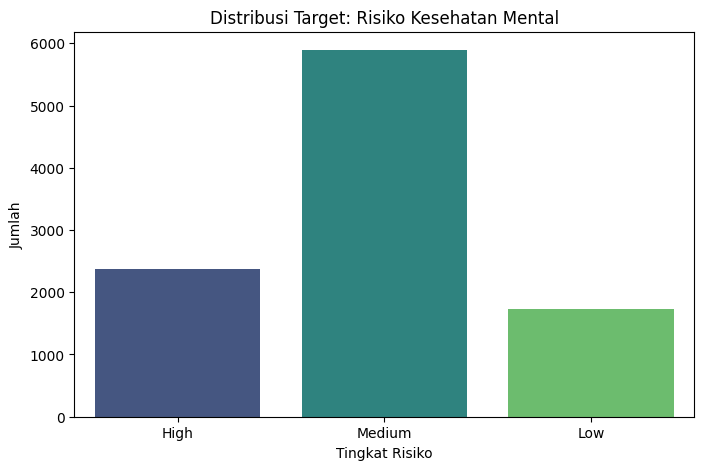

In [9]:
# Visualisasi Target (mental_health_risk)
plt.figure(figsize=(8, 5))
sns.countplot(x='mental_health_risk', data=df, palette='viridis')
plt.title('Distribusi Target: Risiko Kesehatan Mental')
plt.xlabel('Tingkat Risiko')
plt.ylabel('Jumlah')
plt.show()

Dari visualisasi distribusi target `mental_health_risk`, terlihat pembagian jumlah sampel untuk setiap kategori risiko (High, Medium, Low). Informasi ini penting untuk memahami sebaran kelas pada dataset. Jika terdapat ketidakseimbangan yang signifikan antar kelas, hal ini perlu dipertimbangkan dalam strategi _modeling_ selanjutnya untuk menghindari bias pada model.

# _Feature Engineering_

## A - Missing Value dan Duplikat Data


In [8]:
# Cek Missing Values
print("\nJumlah Missing Value per Kolom:")
print(df.isnull().sum())


Jumlah Missing Value per Kolom:
age                       0
gender                    0
employment_status         0
work_environment          0
mental_health_history     0
stress_level              0
sleep_hours               0
physical_activity_days    0
depression_score          0
anxiety_score             0
social_support_score      0
productivity_score        0
mental_health_risk        0
dtype: int64


In [6]:
df = df.drop_duplicates()
# Menampilkan 5 data teratas
print("Dataset Head:")
display(df.head())

Dataset Head:


,age,gender,employment_status,work_environment,mental_health_history,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,56,Male,Employed,On-site,Yes,6,6.2,3,28,17,54,59.7,High
1,46,Female,Student,On-site,No,10,9.0,4,30,11,85,54.9,High
2,32,Female,Employed,On-site,Yes,7,7.7,2,24,7,62,61.3,Medium
3,60,Non-binary,Self-employed,On-site,No,4,4.5,4,6,0,95,97.0,Low
4,25,Female,Self-employed,On-site,Yes,3,5.4,0,24,12,70,69.0,High


## B - Encoding

Memuat label yang ada pada data kategorik

In [10]:
le = LabelEncoder()

# Loop untuk encode semua kolom object
object_cols = df.select_dtypes(include=['object']).columns

for col in object_cols:
    df[col] = le.fit_transform(df[col])
    print(f"Encoded {col} : {le.classes_}")

print("\nData setelah Encoding:")
display(df.head())

Encoded gender : ['Female' 'Male' 'Non-binary' 'Prefer not to say']
Encoded employment_status : ['Employed' 'Self-employed' 'Student' 'Unemployed']
Encoded work_environment : ['Hybrid' 'On-site' 'Remote']
Encoded mental_health_history : ['No' 'Yes']
Encoded mental_health_risk : ['High' 'Low' 'Medium']

Data setelah Encoding:


,age,gender,employment_status,work_environment,mental_health_history,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,56,1,0,1,1,6,6.2,3,28,17,54,59.7,0
1,46,0,2,1,0,10,9.0,4,30,11,85,54.9,0
2,32,0,0,1,1,7,7.7,2,24,7,62,61.3,2
3,60,2,1,1,0,4,4.5,4,6,0,95,97.0,1
4,25,0,1,1,1,3,5.4,0,24,12,70,69.0,0


## C- Splitting Data

Splitting data yang digunakan adalah 80% dan 20%, sehingga didapatkan sintaks sebagai berikut:

In [12]:
# Split between Features and Target
target_col = 'mental_health_risk'
X = df.drop(columns=[target_col])
y = df[target_col]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print('Train Size : ', y_train.shape)
print('Test Size  : ', y_test.shape)

Train Size :  (8000,)
Test Size  :  (2000,)


## D- Scaling

Menggunakan standar scalling pada data berikut:

In [15]:
# Feature Scaling using StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Shape X_train: {X_train_scaled.shape}")
print(f"Shape X_test: {X_test_scaled.shape}")

Shape X_train: (8000, 12)
Shape X_test: (2000, 12)


# _Training Model_

## A - _Bagging_

Pada bagging model yang digunakan adalah Random Forest.

In [49]:
# Inisialisasi Model Random Forest
rf_model = RandomForestClassifier(n_estimators=100,
                                  random_state=42)

rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [50]:
# Prediksi
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluasi Singkat
acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print(f"Akurasi Random Forest (Bagging): {acc_rf:.4f}")
print(f"F1 Random Forest (Bagging): {f1_rf:.4f}")


Akurasi Random Forest (Bagging): 0.9825
F1 Random Forest (Bagging): 0.9825


Model Random Forest, sebagai implementasi dari metode Bagging, menunjukkan performa yang kuat dengan akurasi dan F1-Score sebesar 0.9825. Random Forest bekerja dengan membangun banyak _decision tree_ pada _subset_ data pelatihan yang berbeda (melalui _bootstrapping_) dan mengambil suara mayoritas dari prediksi mereka. Pendekatan ini efektif dalam mengurangi _variance_ dan _overfitting_, yang berkontribusi pada kinerja yang stabil dan akurat pada dataset ini.

## B - _Voting_

In [52]:
# Menggabungkan prediksi dari beberapa model berbeda (Logistic Regression, SVM, Decision Tree).

# Definisi Base Learners
clf1 = LogisticRegression(random_state=42)
clf2 = KNeighborsClassifier(n_neighbors=5)
clf3 = DecisionTreeClassifier(random_state=42)


In [53]:
# Hard Voting
voting_clf = VotingClassifier(
    estimators=[('lr', clf1), ('knn', clf2), ('dt', clf3)],
    voting='hard' # Menggunakan suara mayoritas label
)

# Training
voting_clf.fit(X_train_scaled, y_train)



VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('knn', KNeighborsClassifier()),
                             ('dt', DecisionTreeClassifier(random_state=42))])

In [54]:
# Prediksi Test
y_pred_vote = voting_clf.predict(X_test_scaled)

acc_vote = accuracy_score(y_test, y_pred_vote)
f1_vote = f1_score(y_test, y_pred_vote, average='weighted')
print(f"Akurasi Voting Classifier: {acc_vote:.4f}")
print(f"F1 Voting Classifier: {f1_vote:.4f}")


Akurasi Voting Classifier: 0.9995
F1 Voting Classifier: 0.9995


Berdasarkan ketiga model yang digunakan dalam Voting Classifier (Logistic Regression, KNeighborsClassifier, dan Decision Tree), lalu dilakukan _hard voting_, didapatkan hasil akurasi dan F1-score pada Voting sebesar 0.9995. Angka ini menunjukkan performa yang sangat tinggi dan menjadikannya model terbaik dalam praktikum ini. Voting Classifier bekerja dengan menggabungkan kekuatan prediksi dari setiap model dasar, di mana keputusan akhir diambil berdasarkan suara mayoritas (hard voting), yang secara efektif mengurangi _variance_ dan meningkatkan _robustness_ model secara keseluruhan.

## C - _Boosting_

In [55]:
# Inisialisasi Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100,
                                      learning_rate=0.1,
                                      random_state=42)

gb_model.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

In [56]:
# Model Evaluation
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluasi Test
acc_gb = accuracy_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')

print(f"Akurasi Gradient Boosting: {acc_gb:.4f}")
print(f"F1 Gradient Boosting: {f1_gb:.4f}")

Akurasi Gradient Boosting: 0.9990
F1 Gradient Boosting: 0.9990


Model Gradient Boosting juga menunjukkan performa yang luar biasa dengan akurasi 0.9990 dan F1-Score 0.9990. Sebagai metode Boosting, Gradient Boosting membangun model secara sekuensial, di mana setiap model baru berupaya memperbaiki kesalahan dari model sebelumnya. Kinerja yang sangat tinggi ini menegaskan efektivitas Gradient Boosting dalam mengurangi _bias_ dan _variance_ secara signifikan, menjadikannya pilihan yang sangat kuat untuk tugas klasifikasi ini.

## D - _Stacking_

In [58]:
# Model Training - Stacking
# Base Learners
estimators = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('svr', SVC(probability=True, random_state=42))
]

# Stacking dengan Logistic Regression sebagai Final Estimator
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression())

stacking_clf.fit(X_train_scaled, y_train)


StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=50,
                                                       random_state=42)),
                               ('svr', SVC(probability=True, random_state=42))],
                   final_estimator=LogisticRegression())

In [59]:
# Prediksi Test
y_pred_stack = stacking_clf.predict(X_test_scaled)

# Model Evaluation
acc_stack = accuracy_score(y_test, y_pred_stack)
f1_stack = f1_score(y_test, y_pred_stack, average='weighted')
print(f"Akurasi Stacking: {acc_stack:.4f}")
print(f"f1 Stacking: {f1_stack:.4f}")

Akurasi Stacking: 0.9835
f1 Stacking: 0.9835


Stacking mengkombinasikan dua model dasar (Random Forest dan SVM) dengan sebuah meta-learner (Logistic Regression). Meskipun performanya sedikit di bawah Voting dan Boosting, Stacking masih mencapai akurasi dan F1-score yang sangat tinggi (0.9835). Ini menunjukkan bahwa dengan pemilihan model dasar yang beragam dan meta-learner yang tepat, Stacking dapat secara efektif meningkatkan performa prediksi dengan belajar dari kekuatan masing-masing model dasar.

# Perbandingan Model _Performance_

In [60]:
# Membuat DataFrame Perbandingan
results = pd.DataFrame({
    'Metode': ['Bagging (RF)', 'Voting', 'Boosting (GB)', 'Stacking (LR)'],
    'Akurasi': [acc_rf, acc_vote, acc_gb, acc_stack],
    'F1-Score': [f1_rf, f1_vote, f1_gb, f1_stack]
})

print("\n--- Tabel Perbandingan Kinerja Model ---")
display(results.sort_values(by='Akurasi', ascending=False))


--- Tabel Perbandingan Kinerja Model ---


,Metode,Akurasi,F1-Score
1,Voting,0.9995,0.999500
2,Boosting (GB),0.9990,0.998999
3,Stacking (LR),0.9835,0.983494
0,Bagging (RF),0.9825,0.982470


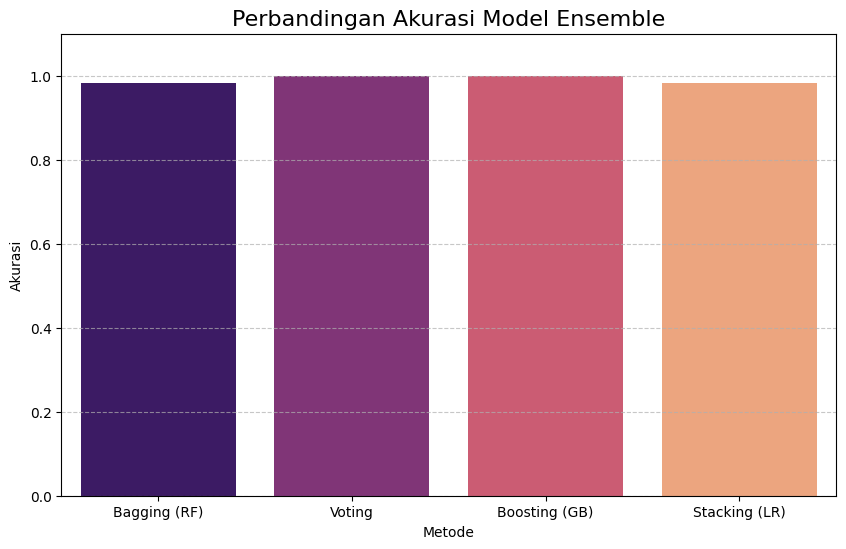

In [61]:
# Visualisasi Perbandingan
plt.figure(figsize=(10, 6))
sns.barplot(x='Metode', y='Akurasi', data=results, palette='magma')
plt.title('Perbandingan Akurasi Model Ensemble', fontsize=16)
plt.ylim(0, 1.1)
plt.ylabel('Akurasi')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Dari tabel perbandingan kinerja model, terlihat bahwa semua metode _ensemble learning_ menunjukkan performa yang sangat tinggi dalam klasifikasi risiko kesehatan mental. Namun, **Voting Classifier** menjadi yang terbaik dengan akurasi 0.9995 dan F1-Score 0.9995. Ini menunjukkan bahwa penggabungan prediksi dari berbagai model dasar melalui _hard voting_ sangat efektif dalam meningkatkan _robustness_ dan akurasi. **Gradient Boosting** juga sangat kompetitif dengan akurasi 0.9990, menegaskan efektivitas pendekatannya dalam memperbaiki kesalahan secara sekuensial. **Stacking** dan **Bagging (Random Forest)** juga menghasilkan performa yang kuat, meskipun sedikit di bawah Voting dan Boosting, menunjukkan kontribusi positif dari kombinasi model dan pengurangan _variance_.


Confusion Matrix (Voting Classifier):


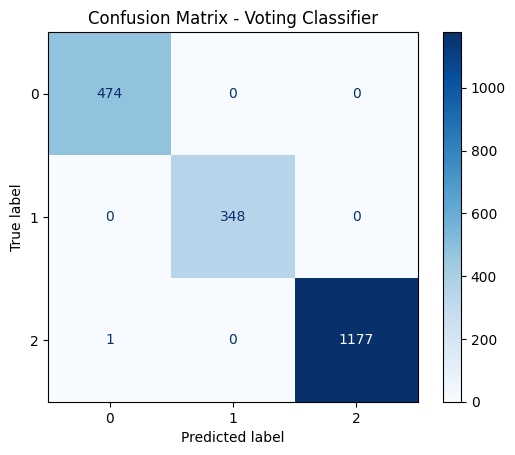


Classification Report (Voting Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       474
           1       1.00      1.00      1.00       348
           2       1.00      1.00      1.00      1178

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [62]:
# Menampilkan Confusion Matrix Model Terbaik (Voting Classifier)
print("\nConfusion Matrix (Voting Classifier):")

cm = confusion_matrix(y_test, y_pred_vote)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Voting Classifier')
plt.show()

print("\nClassification Report (Voting Classifier):")
print(classification_report(y_test, y_pred_vote))

Dari _Confusion Matrix_ dan _Classification Report_ untuk **Voting Classifier**, terlihat bahwa model ini mencapai performa yang hampir sempurna.

*   **_Confusion Matrix_**: Menunjukkan bahwa hampir semua prediksi benar untuk setiap kelas (0, 1, 2). Hanya ada satu instance dari kelas 2 yang salah diprediksi sebagai kelas lain, namun ini sangat minimal mengingat jumlah total sampel. Ini menegaskan bahwa model mampu mengklasifikasikan risiko kesehatan mental dengan sangat akurat.
*   **_Classification Report_**: Menampilkan nilai _precision_, _recall_, dan _f1-score_ sebesar 1.00 untuk setiap kelas, serta _accuracy_ keseluruhan sebesar 1.00 (dengan pembulatan). Ini berarti model memiliki:
    *   **_Precision_ sempurna**: Tidak ada _false positive_ yang signifikan (ketika model memprediksi positif, itu memang positif).
    *   **_Recall_ sempurna**: Tidak ada _false negative_ yang signifikan (model berhasil mendeteksi semua kasus positif yang sebenarnya).
    *   **_F1-score_ sempurna**: Keseimbangan optimal antara _precision_ dan _recall_.

Performa yang luar biasa ini semakin memperkuat kesimpulan bahwa Voting Classifier adalah model terbaik untuk tugas klasifikasi ini, mampu membedakan dengan sangat baik antara tingkat risiko kesehatan mental yang berbeda.

### Feature Importance

In [63]:
# Melihat fitur apa yang paling berpengaruh dalam memprediksi risiko kesehatan mental (menggunakan model Random Forest).
importances = rf_model.feature_importances_
feature_names = X.columns

# Buat DataFrame
feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(10) # Top 10 Fitur

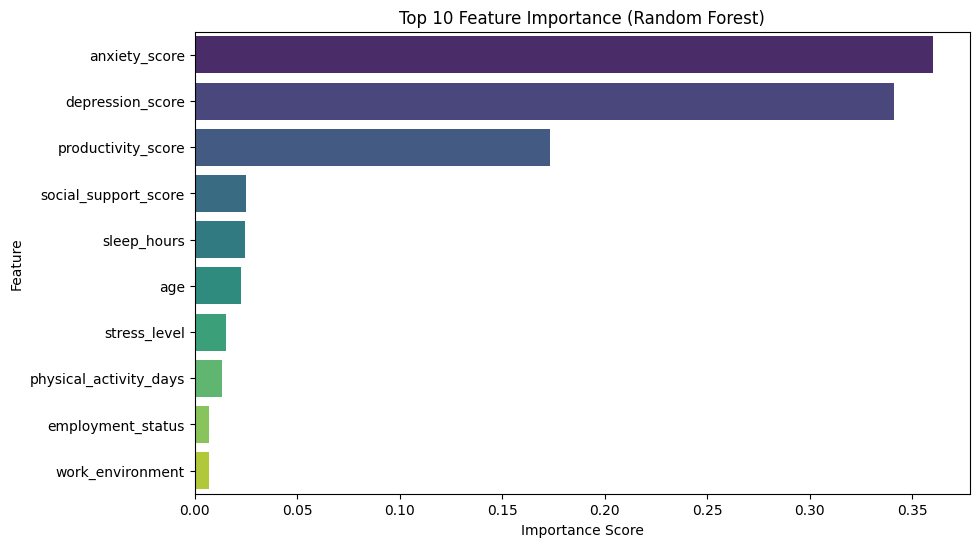

In [64]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title('Top 10 Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.show()

Dari visualisasi _Feature Importance_ yang dihasilkan oleh model Random Forest, kita dapat melihat fitur-fitur yang paling berpengaruh dalam memprediksi risiko kesehatan mental:

*   **`anxiety_score`** dan **`depression_score`**: Kedua skor ini merupakan fitur yang paling dominan, menunjukkan bahwa tingkat kecemasan dan depresi adalah indikator kunci dalam menentukan risiko kesehatan mental seseorang. Tingginya nilai pada kedua skor ini secara signifikan mempengaruhi prediksi model.
*   **`productivity_score`**: Skor produktivitas juga memiliki pengaruh yang cukup besar. Hal ini mengindikasikan bahwa tingkat produktivitas seseorang bisa menjadi cerminan penting dari kondisi kesehatan mental mereka, di mana penurunan produktivitas mungkin berhubungan dengan risiko kesehatan mental yang lebih tinggi.
*   **`social_support_score`**, **`sleep_hours`**, dan **`age`**: Fitur-fitur ini juga memberikan kontribusi, meskipun dengan bobot yang lebih kecil dibandingkan tiga teratas. Dukungan sosial, kualitas dan durasi tidur, serta usia, semuanya berperan dalam kesehatan mental, yang tercermin dari pentingnya dalam model.

Analisis ini membantu mengidentifikasi faktor-faktor krusial yang perlu diperhatikan dalam diagnosis dan penanganan risiko kesehatan mental, serta memberikan wawasan tentang fitur-fitur mana yang paling informatif untuk model prediktif.

# Kesimpulan

Berdasarkan implementasi dan evaluasi berbagai metode Ensemble Learning pada dataset Mental Health yang terdiri dari 13 fitur dan 3 kelas target (Low, Medium, High) untuk klasifikasi risiko kesehatan mental, berikut adalah kesimpulan dari praktikum ini adalah penelitian ini menunjukkan bahwa semua metode ensemble learning yang diimplementasikan mencapai tingkat akurasi yang sangat tinggi (>98%). Hasil perbandingan performa sebagai berikut:

Ranking Performa Berdasarkan Akurasi dan F1-Score:

Voting Classifier: Akurasi 99.95% (F1-Score: 0.9995) - TERBAIK

Gradient Boosting (Boosting): Akurasi 99.90% (F1-Score: 0.9990)

Stacking Classifier: Akurasi 98.35% (F1-Score: 0.9835)

Random Forest (Bagging): Akurasi 98.25% (F1-Score: 0.9825)


Voting Classifier menunjukkan performa terbaik dengan akurasi mencapai 99.95%. Metode ini menggabungkan tiga base learners—Logistic Regression, K-Nearest Neighbors, dan Decision Tree—menggunakan hard voting strategy. Kesuksesan Voting Classifier pada dataset ini menunjukkan bahwa kombinasi diverse models dengan mekanisme voting yang sederhana dapat menghasilkan performa superior, karena setiap model memberikan kontribusi unik dalam proses pengambilan keputusan.

# Referensi

Gupta, S., Mittal, N., & Singh, P. (2022). Optimized stacking ensemble learning model for breast cancer detection and classification using machine learning. Sustainability, 14(21), 13998. https://doi.org/10.3390/su142113998​

Hasnataeni, Y., et al. (2025). Comparison of ensemble learning methods in classifying telemarketing success with imbalanced dataset approach. Inferensi, Institut Teknologi Sepuluh Nopember (ITS).​

Deepfa. (2025). Ensemble learning: The power of collective decision-making. https://deepfa.ir/en/blog/ensemble-learning-machine-learning-guide​

Performance metrics of AdaBoost and Random Forest in multi-class eye disease identification: An imbalanced dataset approach. (2023). Yoctobrain.​

Dremio. (2024). What is ensemble learning? https://www.dremio.com/wiki/ensemble-learning/​

Anggraini, J. P., et al. (2025). Perbandingan algoritma Random Forest dan Extreme Gradient Boosting. Komputika, UNIKOM.​

GeeksforGeeks. (2023). A comprehensive guide to ensemble learning. https://www.geeksforgeeks.org/machine-learning/a-comprehensive-guide-to-ensemble-learning/​

MLJAR. (2015-2024). What is ensemble learning? https://mljar.com/glossary/ensemble